# Potential Energy Feature Experiments
This notebook includes experiments for adding the `potential_energy.csv` as part of the training and test sets. A set of multiple experiments has been conducted and their performance in correlation with the existing training data is used to make a selection of method to use.

## Imports

In [1]:
import os
import csv
import warnings
import numpy as np
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

from ase import Atoms
from ase.calculators.emt import EMT

## Load the Required Dataset Files

In [2]:
potential_energy = pd.read_csv('input/potential_energy.csv')
structures = pd.read_csv('input/structures.csv')
test = pd.read_csv('input/test.csv')
train = pd.read_csv('input/train.csv')

## Experiment 1: Potential Energy Prediction (Kaggle Kernel)
Resource: https://www.kaggle.com/enrique1500/easy-potential-energy-prediction

### Define Parameters

In [3]:
# Ploting Parameters
FIGSIZE = (10, 6)
sns.set() # Set seaborn style

# Notebook Parameters
SAVE_PICKLE = True
FREE_MEMORY = True
OUTPUT_FILE = "potential_energy_upd"

# kFold Validation Parameters
RANDOM_STATE = 123 # 123
N_SPLITS = 3 # 3
SHUFFLE = True
VERBOSE = False

### List Atoms in the same Molecule

In [4]:
# One row per molecule
molecule_train = pd.DataFrame({"molecule_name" : train["molecule_name"].unique()})
molecule_test = pd.DataFrame({"molecule_name" : test["molecule_name"].unique()})
atom_list_df = structures.groupby('molecule_name')['atom'].apply(list)
atom_list_df = atom_list_df.to_frame()

### Merge Atoms List to Molecule Train and Test

In [5]:
molecule_train = pd.merge(molecule_train, atom_list_df, how='left', on='molecule_name')
molecule_test = pd.merge(molecule_test, atom_list_df, how='left', on='molecule_name')

### Count Distinct Atoms in a Molecule

In [6]:
# Count atoms by type
atoms_list = structures.atom.unique().tolist()
print("Distinct atoms in structures data: \n {}".format(atoms_list))

for atom in atoms_list:
    molecule_train['atom_' + atom] = molecule_train['atom'].apply(lambda x: x.count(atom))
    molecule_test['atom_' + atom] = molecule_test['atom'].apply(lambda x: x.count(atom))

Distinct atoms in structures data: 
 ['C', 'H', 'N', 'O', 'F']


### Merge Potential Energy

In [7]:
molecule_train = pd.merge(molecule_train, potential_energy)
molecule_train.head()

,molecule_name,atom,atom_C,atom_H,atom_N,atom_O,atom_F,potential_energy
0,dsgdb9nsd_000001,"[C, H, H, H, H]",1,4,0,0,0,-40.52368
1,dsgdb9nsd_000002,"[N, H, H, H]",0,3,1,0,0,-56.56025
2,dsgdb9nsd_000003,"[O, H, H]",0,2,0,1,0,-76.42608
3,dsgdb9nsd_000005,"[C, N, H]",1,1,1,0,0,-93.42849
4,dsgdb9nsd_000007,"[C, C, H, H, H, H, H, H]",2,6,0,0,0,-79.83869


### Fit Linear Model and Validate Results

#### Select Features

In [8]:
id_feature = 'molecule_name'
target_feature = (set(molecule_train) - set(molecule_test)).pop()
selected_features = list(molecule_test)
selected_features.remove(id_feature)
selected_features.remove('atom')
print("Selected Features: \t{}".format(selected_features))
print("Target Feature: \t{}".format(target_feature))
print("Id Feature: \t\t{}".format(id_feature))

Selected Features: 	['atom_C', 'atom_H', 'atom_N', 'atom_O', 'atom_F']
Target Feature: 	potential_energy
Id Feature: 		molecule_name


#### Train and Test Dataframes

In [9]:
X = molecule_train[selected_features]
y = molecule_train[target_feature]

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989574703438410807621039566583931446075439453125000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016595473708328832129071939149866921070497483015060424804687500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989576927956758112259194604121148586273193359375000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016311218470442738308345820286149319144897162914276123046875000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989576825070169974196687689982354640960693359375000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016537724446490345737992289087969766114838421344757080078125000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989576727574824843713940936140716075897216796875000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016643859211167958984251002974019684188533574342727661132812500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989575245233908162845182232558727264404296875000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016458681222732158416777181741963431704789400100708007812500000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989576218970555032683478202670812606811523437500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016439914174831708922053241650473864865489304065704345703125000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989576284405989881065579538699239492416381835937500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016379607447616140788321237309332900622393935918807983398437500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989575852685774748351832386106252670288085937500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016433813845559944351315539989855096791870892047882080078125000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989571906342522567001651623286306858062744140625000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016477464424955697627067641164444466994609683752059936523437500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989577025072406968320137821137905120849609375000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016574837265552391091238959575093758758157491683959960937500000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989574560472771480590381543152034282684326171875000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016586103569306226770962986449831078061833977699279785156250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989568833960174032426948542706668376922607421875000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016460443357139802056376964856099220924079418182373046875000000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989575157435250929438552702777087688446044921875000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016567133819784078674341998294039512984454631805419921875000000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989575315200163174722547410055994987487792968750000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016429846358477703804901182138564763590693473815917968750000000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989577348333824602377717383205890655517578125000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016667260577591018564508340560337273927871137857437133789062500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989573471489423539537710894364863634109497070312500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016411671475572734910097771887649287236854434013366699218750000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989573640934992226902977563440799713134765625000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016442606625813075641590055298024708463344722986221313476562500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989575922182405420812756347004324197769165039062500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016437451039451479034569914006169710773974657058715820312500000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989575590180201913881319342181086540222167968750000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016405394933041517538385711816317780176177620887756347656250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989576939800617338960364577360451221466064453125000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016573047190538523366215573062731891695875674486160278320312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989576074852504206091907690279185771942138671875000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016598175104018968086666552252950168622191995382308959960937500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989575461443180870446667540818452835083007812500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016678566435923511835498489475071437482256442308425903320312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989576747647657128936771186999976634979248046875000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016515623991280989259905487287483083491679280996322631835937500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989575474574898805713019100949168205261230468750000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016579450481278780633875857830616951105184853076934814453125000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989576903161037080280948430299758911132812500000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016591807582750971259560879289551849069539457559585571289062500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989575743887249004160366894211620092391967773437500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016691998945076076416721422290834198065567761659622192382812500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989576487966491669112656381912529468536376953125000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016525680604074753383275764306858945928979665040969848632812500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989576433392368670638461480848491191864013671875000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016489287855525772228532099816789013857487589120864868164062500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989576462881002427707244351040571928024291992187500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016494850834514558288179664202743879286572337150573730468750000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989576799294122011474428290966898202896118164062500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016600683757199352023198324346253684780094772577285766601562500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989569399878597266706492519006133079528808593750000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016362253054655153446800275318651074485387653112411499023437500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989573760118544143438157334458082914352416992187500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016531159124868021869508849519547766249161213636398315429687500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989575104297756524829310365021228790283203125000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016639995681074009562655513505546878150198608636856079101562500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989574693568528118703397922217845916748046875000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016640096298109194935394006265028110647108405828475952148437500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989575085976856172464977134950459003448486328125000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016570139749558390838274357648174373025540262460708618164062500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989572118582747961568202299531549215316772460937500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016640868717776120724177735255011612025555223226547241210937500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989574410375059443367717904038727283477783203125000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016470224478692420660291828582444395578932017087936401367187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989576463548246465506963431835174560546875000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016494337931694110725017177188078676408622413873672485351562500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989576423773396385286105214618146419525146484375000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016536206531536272804072673636710533173754811286926269531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989576350705178242606052663177251815795898437500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016633336677336371754037935843939521873835474252700805664062500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989575096261962272592427325434982776641845703125000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016397418100448618149406199151485452603083103895187377929687500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989577322465628128611569991335272789001464843750000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016430160847370034026687646289133226673584431409835815429687500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989576447252392910058915731497108936309814453125000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016416201466482197111190766136701313371304422616958618164062500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989572239446067314361243916209787130355834960937500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016411586640644234419417202275326417293399572372436523437500000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989575580783274233453994384035468101501464843750000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016553135207094686522782955861998743785079568624496459960937500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989577018273401165515679167583584785461425781250000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016567777389392525713707193801838002400472760200500488281250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989575902499261417233356041833758354187011718750000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016585790483126365297411597410359718196559697389602661132812500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989573468848202963954463484697043895721435546875000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016608322200214961378988975937431860074866563081741333007812500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989572651617475429475234705023467540740966796875000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016532003607569120424286568393767993256915360689163208007812500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989571852139214058752259006723761558532714843750000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016589640822838910404896095585058901633601635694503784179687500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989575929395524411802398390136659145355224609375000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016569887629308724212584547075266527826897799968719482421875000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989572059460041231204741052351891994476318359375000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016497873760555532320071225882429644116200506687164306640625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989572995940934063696658995468169450759887695312500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016685449859764498944936228497226693434640765190124511718750000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989572386893676991803658893331885337829589843750000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016737907084187178714806965018624396179802715778350830078125000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989575201738700727105424448382109403610229492187500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016563374456252440841685924510784388985484838485717773437500000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989574469745345908222589059732854366302490234375000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016579547244654671122460198873227454896550625562667846679687500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989576349495035145764632034115493297576904296875000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016393129320509565709923505139045118994545191526412963867187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989574251493262835310815717093646526336669921875000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016518769499590567687019593279273976804688572883605957031250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989575947856312865269501344300806522369384765625000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016548332530697403789515798067100149637553840875625610351562500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989575854660861509159985871519893407821655273437500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016628062344004790242685265511113357206340879201889038085937500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989575591803347975883298204280436038970947265625000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016645027787213480339328919299646258878055959939956665039062500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989574510370626825306317186914384365081787109375000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016508892443562004238161167180010124866385012865066528320312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989576802543744804552261484786868095397949218750000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016600246533978652886676119493358783074654638767242431640625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989576460934781465539344935677945613861083984375000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016705495055975791169472488562064427242148667573928833007812500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989575170769029455186682753264904022216796875000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016640728538330317853172202191558426420670002698898315429687500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989576228076604280659012147225439548492431640625000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016593328921101282991124037380359368398785591125488281250000000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989576518673040084195235976949334144592285156250000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016606074180168868721640951235940519836731255054473876953125000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989574706349415578188200015574693679809570312500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016456903538953598486321849847513476561289280652999877929687500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989576101622201775853682192973792552947998046875000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016585371762744963771568640353848422819282859563827514648437500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989576660754941883624269394204020500183105468750000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016649827247612089108769195533454876567702740430831909179687500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989576633336874067481403471902012825012207031250000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016588595863923671133027815116633973957505077123641967773437500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989575885023240786608766939025372266769409179687500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016666307489143952335480802773304276342969387769699096679687500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989576646648448132737030391581356525421142578125000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016569880002408863845647646328984592400956898927688598632812500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989576478393038527769931533839553594589233398437500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016507418313104051197509614112846065836492925882339477539062500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989574447639695264911097183357924222946166992187500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016446682954398602477530388910054170992225408554077148437500000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989576399572754894506942946463823318481445312500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016516583863217684877838786761117262358311563730239868164062500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989575470307201499053917359560728073120117187500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016566495534578713853118836496491894649807363748550415039062500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989575716139444949703829479403793811798095703125000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016482186158386956994353900185501515807118266820907592773437500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989575799663743538303606328554451465606689453125000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016457902082920162871448876984459275263361632823944091796875000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989576720089701211691135540604591369628906250000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016511663898559933265353105724670967902056872844696044921875000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989577223319381360511215461883693933486938476562500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016598579621419839655316330606638075551018118858337402343750000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989573423669897422882968385238200426101684570312500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016640787852175403360027727828196475456934422254562377929687500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989574212539977793312573339790105819702148437500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016488884618206479590329927020775357959792017936706542968750000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989574657041080385511122585739940404891967773437500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016590751743967742382057650729620945639908313751220703125000000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989574942792502909583163273055106401443481445312500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016548914190642064273029099297218635911121964454650878906250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989574040946127553297628764994442462921142578125000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016515962791295722873752271908642796915955841541290283203125000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989574391652258356089078006334602832794189453125000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016608325289990937684292404696861922275274991989135742187500000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989575330214819359753164462745189666748046875000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016556044744718276858636007986547156178858131170272827148437500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989572907714840965809344197623431682586669921875000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016505871454295091647207494034432784246746450662612915039062500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989576188357265351669411757029592990875244140625000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016528783773075712403705095354666809726040810346603393554687500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989575179679679450828189146704971790313720703125000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016478487907510231888497109764557535527274012565612792968750000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989576850667472029954296885989606380462646484375000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016680453908809740170421376248555134225171059370040893554687500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989575185239676358150973101146519184112548828125000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016613824855496084256095690179222401638980954885482788085937500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989575039298639325124895549379289150238037109375000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016487491913625485547706395195177719870116561651229858398437500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989573392533692697270453209057450294494628906250000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016745746071744381858192873835378122748807072639465332031250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989576422828596591330096998717635869979858398437500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016551294329856553345231562346384635020513087511062622070312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989575407576269938658697356004267930984497070312500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016513796091004878403146749477059529453981667757034301757812500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989577376752203363707849348429590463638305664062500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016595512191667325004040822733486493234522640705108642578125000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989575588117407534127778490073978900909423828125000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016588661421334427621687712672837733407504856586456298828125000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989574149537041591884189983829855918884277343750000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016627494549792860584896958542344691522885113954544067382812500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989575533392294204304562299512326717376708984375000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016537245974178745814425761651023094600532203912734985351562500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989577199769330562162394926417618989944458007812500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016606012471828829335507293762930203229188919067382812500000000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989576287737769177965674316510558128356933593750000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016567530443198760694428761652829962258692830801010131835937500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989575831227384128396806772798299789428710937500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016651369358796626156393738682481853174977004528045654296875000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989576976302529942586261313408613204956054687500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016525076413968268172760556211642324342392385005950927734375000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989575874923541931593717890791594982147216796875000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016458240624952959890725523450782930012792348861694335937500000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989576096689480877444111683871597051620483398437500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016523591369870780937861853843173776112962514162063598632812500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989573161320866034884602413512766361236572265625000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016422473034729760232169892830711432907264679670333862304687500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989573259816522110554615210276097059249877929687500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016594688857379824055426897899678806425072252750396728515625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989575849261846940407849615439772605895996093750000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016720614112138063554746647554338778718374669551849365234375000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989576492149812025900246226228773593902587890625000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016614322191168086947227200411703051941003650426864624023437500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989575919003836901310933171771466732025146484375000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016636574344640203421824553586816364258993417024612426757812500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989576676928670906363549875095486640930175781250000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016502974685253853776023547084150777664035558700561523437500000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989576990855333349372813245281577110290527343750000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016505788153945803991423657564041604928206652402877807617187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989576467261942482878112059552222490310668945312500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016516128562108589421242310635307148913852870464324951171875000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989577363477266658264852594584226608276367187500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016688079294819185317833021287015071720816195011138916015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989576733059326585362214245833456516265869140625000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016321303813151917441043314838111655262764543294906616210937500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989573577732215881042066030204296112060546875000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016512286946859125544989632672354673559311777353286743164062500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989577229475568032057708478532731533050537109375000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016301305260266400320307011995168977591674774885177612304687500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average

 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	0.9999989575941121699997893301770091056823730468750000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016489407615501725304363311863653507316485047340393066406250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
 * Average Variance Score (R2): 	-263194572807504256.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0015832068291729481639834586914616920694243162870407104492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold

 * Average Variance Score (R2): 	0.9999989576654478851125418259471189230680465698242187500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016632019252143506651137050411648488079663366079330444335937500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989575489888204984367803263012319803237915039062500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016345161338109173449623101603833674744237214326858520507812500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989573986542978900615707971155643463134765625000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016558788765884643098130757365993304119911044836044311523437500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989575620977788616983161773532629013061523437500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016573101257125171653639128521717793773859739303588867187500000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989575125308727265860397892538458108901977539062500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016611232403623253390395619888408873521257191896438598632812500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989577244404737044192188477609306573867797851562500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016722517375020830906334756704723076836671680212020874023437500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989576706244109871590808324981480836868286132812500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016743705421005314597920898833649516745936125516891479492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989574750615117793017816438805311918258666992187500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016463044596054837893917000002375061740167438983917236328125000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989575761102367223998044210020452737808227539062500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016427778642181072293187993338392516307067126035690307617187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989574431565886314388080791104584932327270507812500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016518115897354531708407510137703866348601877689361572265625000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989576332385388113266344589646905660629272460937500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016439545506755034488810540693748407647944986820220947265625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989576922457823471290794259402900934219360351562500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016348148301253983844666395341960196674335747957229614257812500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989577201265911199357105942908674478530883789062500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016442834285906461188470073508938185113947838544845581054687500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989576142812586212471614999230951070785522460937500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016521730971740707094586042558148619718849658966064453125000000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989577040664379126155836274847388267517089843750000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016800694500045572354895995204060454852879047393798828125000000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989575531795793494893587194383144378662109375000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016294942214282706789696408833378882263787090778350830078125000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989575240114669796298585424665361642837524414062500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016528477209990619263557665163943966035731136798858642578125000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989576078945896497884859854821115732192993164062500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016687251344612698353980784204964038508478552103042602539062500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989571861492843041219202859792858362197875976562500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016379213678202654298071694327632030763197690248489379882812500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989575947879627548786629631649702787399291992187500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016428216139297308756583859690181270707398653030395507812500000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989576853710593340451850963290780782699584960937500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016595772860237183524145798685367481084540486335754394531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989574041951989613608020590618252754211425781250000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016472055258521752819922401300800629542209208011627197265625000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989575894062676653106791491154581308364868164062500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016514324370747891085331460203633469063788652420043945312500000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989573167046286172876534692477434873580932617187500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016633373842775734958304711952337129332590848207473754882812500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989576022133563881766349368263036012649536132812500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016429318994262867396904947980829092557542026042938232421875000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989574745172804526305299077648669481277465820312500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016630819213108959109259643582845455966889858245849609375000000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989571641823005165861104615032672882080078125000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016536658903940413926914043685201249900273978710174560546875000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989576950042424741127433662768453359603881835937500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016803811510975646872217970084761873295065015554428100585937500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989573358813998993355198763310909271240234375000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016454623046904654458388872484420062392018735408782958984375000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989574593417529513317276723682880401611328125000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016353485162415130893531767242166097275912761688232421875000000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989575624393944863754768448416143655776977539062500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016326444088389212034445607812926937185693532228469848632812500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989575623374760127148874744307249784469604492187500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016558878731255455892673600359898955503012984991073608398437500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989574640298917174163761956151574850082397460937500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016540605702319239114772564391842024633660912513732910156250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989576506274069345181487733498215675354003906250000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016246334018737316681746385427231871290132403373718261718750000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989576267159785416538397839758545160293579101562500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016597162999578659366844979317079378233756870031356811523437500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989574938292768990777403814718127250671386718750000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016421206912024680427131251292394154006615281105041503906250000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989574450459661747458994796033948659896850585937500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016819502882980930623391113698517074226401746273040771484375000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989576278794922714610038383398205041885375976562500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016497161791357477580999280064588674576953053474426269531250000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989575283873000088874505308922380208969116210937500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016462569262650004857373442490597881260327994823455810546875000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989575584175005573683847615029662847518920898437500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016505146012748266471509284158969421696383506059646606445312500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989575777034067627369040565099567174911499023437500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016382340241057843401029092689213939593173563480377197265625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989574478233000931481910811271518468856811523437500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016715658290547580778345748697688577522058039903640747070312500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989575660878093898986662679817527532577514648437500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016518731680227431712904007099496084265410900115966796875000000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989575121821516745512781199067831039428710937500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016605447464402450265252841887786416918970644474029541015625000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989573012570964749556878814473748207092285156250000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016444292837922416458673602335238683735951781272888183593750000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989575889928206109402708534616976976394653320312500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016440096383276904968423481889772119757253676652908325195312500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989574639229772401449736207723617553710937500000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016683450345680056903924226574531530786771327257156372070312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989576130369206552472860494162887334823608398437500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016554775749562506120121652131160772114526480436325073242187500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989573623079275321856584923807531595230102539062500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016651606812688108435333012025125754007603973150253295898437500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989575605624514409441871976014226675033569335937500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016469098503604079602319343322847089439164847135543823242187500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989574239657175169782021839637309312820434570312500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016590516608957306485955252028929862717632204294204711914062500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989575904154603946949464443605393171310424804687500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016680204720321961924661691156757115095388144254684448242187500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989575089767157578535261563956737518310546875000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016584416127949112504391671052417223108932375907897949218750000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989576408196967349795158952474594116210937500000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016393656933709217088379617166538082528859376907348632812500000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989572614053079391283063159789890050888061523437500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016404418969883007711763056590825726743787527084350585937500000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989576759551468398967699613422155380249023437500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016734990181303975240179049421840318245813250541687011718750000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989577275493202179745821922551840543746948242187500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016521240900133297296870082959685532841831445693969726562500000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989573863317104951420333236455917358398437500000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016626916724950067255628383122711966279894113540649414062500000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989575072718572812391357729211449623107910156250000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016503256474541272164763272556342599273193627595901489257812500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989575087875337544573994819074869155883789062500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016328834031247481135135091179222399659920483827590942382812500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989576409195057848933174682315438985824584960937500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016756540263401541786952853030356891395058482885360717773437500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989574417486037916091845545452088117599487304687500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016443867660130343216068338207946908369194716215133666992187500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989576038782468359045196848455816507339477539062500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016769489064430895784718611452035474940203130245208740234375000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989575001763109085572978074196726083755493164062500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016409795256476557030050900110040856816340237855911254882812500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989574783484380660070200974587351083755493164062500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016476862352840936261355597736155687016434967517852783203125000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989576364742838165966531960293650627136230468750000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016427963502702691393764222738127500633709132671356201171875000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989574757911503510854345222469419240951538085937500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016683820301058747623268452286993124289438128471374511718750000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989575493045679266401748463977128267288208007812500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016471148070408311685219882036790295387618243694305419921875000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989574821558369066565319371875375509262084960937500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016751009433107664180206963777663986547850072383880615234375000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989575542623798654062738933134824037551879882812500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016635946854150164206376238951179402647539973258972167968750000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989574767530475796206701488699764013290405273437500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016548876730877618099896375625235123152378946542739868164062500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989575910070982445176923647522926330566406250000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016609698402866464577581906425507440872024744749069213867187500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989575486063486664534138981252908706665039062500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016641352637489833371509106996199989225715398788452148437500000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989575539934838488420609792228788137435913085937500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016478074276515014984917373297435005952138453722000122070312500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989575598604574224737007170915603637695312500000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016483901128262769784915686699378056800924241542816162109375000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989575853905909852414879424031823873519897460937500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016541372234192407587177742200879038136918097734451293945312500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989577277781371833498269552364945411682128906250000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016552129700294117026909690437719291367102414369583129882812500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989575344918613097888737684115767478942871093750000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016522284887314077177211668612244466203264892101287841796875000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989575102218308799706392164807766675949096679687500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016467126604005754165332975347268984478432685136795043945312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989574432510686108344089007005095481872558593750000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016772724048114964409683658175254095112904906272888183593750000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989576399984647636642876022960990667343139648437500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016531166730340827227679900701673432195093482732772827148437500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989575447405520947086188243702054023742675781250000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016430137346933649817454226038648812391329556703567504882812500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989575910849248785439158382359892129898071289062500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016611342830704699333882468081924344005528837442398071289062500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989575741660141616762302874121814966201782226562500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016458919649274868918231717884737008716911077499389648437500000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989576524361822862374538090080022811889648437500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016411119619022215051357127535425206588115543127059936523437500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989576057637385986254230374470353126525878906250000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016559798440360473485710723906549901585094630718231201171875000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989575457637336342031630920246243476867675781250000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016672209822063000905084662051081068057101219892501831054687500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989572549128347134228533832356333732604980468750000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016572505449138758264887583138147419958841055631637573242187500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989575967779265042167935462202876806259155273437500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016633890696242095361134794018198590492829680442810058593750000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989576973313809560295339906588196754455566406250000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016348510883029013316530830834949483687523752450942993164062500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989573736135506365485525748226791620254516601562500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016587105603639755793676791029156447621062397956848144531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989576150567494039478333434090018272399902343750000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016624046217301239030533777096820813312660902738571166992187500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989574074098497291629428218584507703781127929687500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016226226797269461665090828361712738114874809980392456054687500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989574198315800401815067743882536888122558593750000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016604572643682238754919699985634906624909490346908569335937500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989575920493756200357893249019980430603027343750000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016543240524373532731455815891763450053986161947250366210937500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989575983397882552594637672882527112960815429687500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016357030697928534243579257179135311162099242210388183593750000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989575388589235771519270201679319143295288085937500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016614429505153621192958812713413863093592226505279541015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989575833874155819103179965168237686157226562500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016599617209948388640156080597876098181586712598800659179687500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989576247813038989420419966336339712142944335937500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016660182362369228316334446304836092167533934116363525390625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989571315976988330476160626858472824096679687500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016497646848193635044782512366623450361657887697219848632812500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989576222563236740370484767481684684753417968750000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016478438788477588541891982742981781484559178352355957031250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989577495265180573369434569031000137329101562500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016424992642060317910718270084657888219226151704788208007812500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989572231506862465266749495640397071838378906250000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016498962595494260936074271128859436430502682924270629882812500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989575220226134533163531159516423940658569335937500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016360212194705451259346684622641987516544759273529052734375000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989571861428450105790943780448287725448608398437500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016382834927420940156206352611434340360574424266815185546875000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989574993640717437415332824457436800003051757812500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016454425830662467583609398502630938310176134109497070312500000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989574523047153320476354565471410751342773437500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016653939333660791252689215014015644555911421775817871093750000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989576079920672313505747297313064336776733398437500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016546860601306121255071879261322465026751160621643066406250000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989574704200023802513896953314542770385742187500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016453742943134512261710300506933890574146062135696411132812500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989574895518096298019372625276446342468261718750000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016576183474299531050294431722136323514860123395919799804687500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989575899815852366714352683629840612411499023437500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016575997218834662497166654304692201549187302589416503906250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989574620024024298459153214935213327407836914062500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016440213446011911826993845409106143051758408546447753906250000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989576567905880111197802762035280466079711914062500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016693898907814074764749401325047983846161514520645141601562500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989576768690824337681988254189491271972656250000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016295589901880412880136317355095343373250216245651245117187500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989575763496008065089881711173802614212036132812500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016378139437779664841499105421007698168978095054626464843750000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989576768258947581102802359964698553085327148437500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016665031294950769392287925896312117401976138353347778320312500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989576442428473868062610563356429338455200195312500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016386236519944405009424626129543867136817425489425659179687500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989575664945951061213236243929713964462280273437500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016603172196400935688165301229446413344703614711761474609375000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989576024933546349870994163211435079574584960937500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016383852804742647050334491964918015582952648401260375976562500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989575466790014957041421439498662948608398437500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016586626360500745722137416748864779947325587272644042968750000000000000000000000000000000000000000

- Training

- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989573628648154013376370130572468042373657226562500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016447501820036878900782584267403763078618794679641723632812500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989575976213629360245249699801206588745117187500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00165103841459886963027869910547451581805944442749023437500000000000000000000000000000000

 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989576477217312344691890757530927658081054687500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016567525790028331429681873743220421602018177509307861328125000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000

 * Average Variance Score (R2): 	0.9999989576896014531470768815779592841863632202148437500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016503372613002049822117367483542693662457168102264404296875000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989574013158355469954585714731365442276000976562500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016528015096048873349560137668845527514349669218063354492187500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989571257769105372403828368987888097763061523437500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016242996836750434996171632562322884041350334882736206054687500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989577191120693200332425476517528295516967773437500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016526288564559473478338125218556342588271945714950561523437500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989574183428819864616343693342059850692749023437500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016599789571293160125170507157577048928942531347274780273437500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989570577675346285673185775522142648696899414062500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016810791500895634273393675073293707100674510002136230468750000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989575596023305692483518214430660009384155273437500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016611373773080793415923839262404726468957960605621337890625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989573045349189328590000513941049575805664062500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016747560928216745097102391426346912339795380830764770507812500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989575119835327754458376148249953985214233398437500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016344007007558425045856687063405843218788504600524902343750000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989573934490172391065243573393672704696655273437500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016556706522352292957483976820753923675511032342910766601562500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989574155044858017049591580871492624282836914062500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016659024647389963393051548479206758202053606510162353515625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989574456095153820456289395224303007125854492187500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016583306726240772729225048109924500749912112951278686523437500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989572191544384693884239823091775178909301757812500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016680870005335629493309346216278754582162946462631225585937500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989576605367025408099834749009460210800170898437500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016399698363907214571782988699055749748367816209793090820312500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989574702841110820372705347836017608642578125000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016638194077518268527288158864507749967742711305618286132812500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989576311127947860768472310155630111694335937500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016530124274649919333124437059723277343437075614929199218750000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989575189083268469403265044093132019042968750000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016570465562106540501063900450162691413424909114837646484375000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989574454560825600424323056358844041824340820312500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016426399783166061030481586158202844671905040740966796875000000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989573209542292886453651590272784233093261718750000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016680220727190375133025534992725624761078506708145141601562500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989573460587033437718673667404800653457641601562500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016641169787150642770529040959104349894914776086807250976562500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989575623571269602507527451962232589721679687500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016542326851634555403419701846701173053588718175888061523437500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989576567758220448922656942158937454223632812500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016565156363360891873803826257471882854588329792022705078125000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989575146797093907480302732437849044799804687500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016524927031394990792345645047589641762897372245788574218750000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989576474197505717711464967578649520874023437500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016550830823403024465167998613424060749821364879608154296875000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989573510976725856380653567612171173095703125000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016644364439484151795695110465089783247094601392745971679687500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989574361213273689941161137539893388748168945312500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016479542371934862918236852635800460120663046836853027343750000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989573761570715859647862089332193136215209960937500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016337183396271178111025523804755721357651054859161376953125000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989573252406893644206320459488779306411743164062500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016537958284038966998152897502905034343712031841278076171875000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989575737074920525060406362172216176986694335937500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016319857182783396604836001486660279624629765748977661132812500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989575258397822565825663332361727952957153320312500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016644993498935449667552877173193337512202560901641845703125000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989576650789580014588864287361502647399902343750000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016506693642910302919496468021520740876439958810806274414062500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989574892902410852002503816038370132446289062500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016450456754527268809357165579854154202621430158615112304687500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989576320290618482999889238271862268447875976562500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016522352369581713455587435035454291210044175386428833007812500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989575685862552845151185465510934591293334960937500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016376844091568600134817268454412442224565893411636352539062500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989576898794529924430207756813615560531616210937500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016594757875160587572843651216203397780191153287887573242187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989575664222085649157634179573506116867065429687500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016292035885556524228007235777226924255955964326858520507812500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989573850136537203070474788546562194824218750000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016579856102829375243817855434258490276988595724105834960937500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989574654465362968380759411957114934921264648437500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016825479685525081101349353929208518820814788341522216796875000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989575166199351485829538432881236076354980468750000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016422291690594218848547880540422738704364746809005737304687500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989576795657031382802415464539080858230590820312500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016742050204487132596120613214907280053012073040008544921875000000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989575692476151402843242976814508438110351562500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016542640268122528468541787560752709396183490753173828125000000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989574518992618834545282879844307899475097656250000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016581420481478587828499948741978187172207981348037719726562500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	0.9999989576898947740701828479359392076730728149414062500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016902868787230392565168468621550346142612397670745849609375000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	-282074794267546400.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014186108172858362830998091297374230634886771440505981445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
 * Average Variance Score (R2): 	0.9999989575919103756973527197260409593582153320312500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016561238985495138880538190662150554999243468046188354492187500000000000000000000000000000000000000

- Training

 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989574465001362923999295162502676248550415039062500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016393769675657654701084187109927370329387485980987548828125000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467

 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989574580174789275588409509509801864624023437500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016504223056669851260602754905448819044977426528930664062500000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989574989081031475279814912937581539154052734375000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016558937184741869073217879204662494885269552469253540039062500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989576664336521361065024393610656261444091796875000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016630758118571671837909731195281892723869532346725463867187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467

 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989574547911708179981360444799065589904785156250000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016525914524073244057933429473905562190338969230651855468750000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989575590709778296627519011963158845901489257812500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016397441736207777479572555989761895034462213516235351562500000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989576256400614084896005806513130664825439453125000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016645322418076583491364228706288486137054860591888427734375000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467

 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989577103591820161909708986058831214904785156250000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016833324577129593884600167186249564110767096281051635742187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989570713401221269123197998851537704467773437500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016671260063179636247421289141357192420400679111480712890625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989576397578794342280161799862980842590332031250000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016358979301517070480825877254460465337615460157394409179687500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989573407148668593436013907194137573242187500000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016546996012895018399874169645613619650248438119888305664062500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989573336978132545027619926258921623229980468750000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016679899766628583732824830931917858833912760019302368164062500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989573011527355106409231666475534439086914062500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016471315511152040660797224447264852642547339200973510742187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989575773422512128263406339101493358612060546875000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016467193789750029023211119749703357229009270668029785156250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989575137218089651014452101662755012512207031250000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016395302291772736666408682992823742097243666648864746093750000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989574155343508010673758690245449542999267578125000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016377592610076479196640208968460683536250144243240356445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989575853129863958201895002275705337524414062500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016519799233363819963155139092236822762060910463333129882812500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989574474901221634581816033460199832916259765625000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016735333276313647983546406550203755614347755908966064453125000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989573993042224486771374358795583248138427734375000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016310358461416405578825461475389602128416299819946289062500000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989575206592595790766608843114227056503295898437500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016893151054317751165456673589915226330049335956573486328125000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467

 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989574616743315260691815637983381748199462890625000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016552707017598903508487362401524478627834469079971313476562500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467

 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989575129323293722904963942710310220718383789062500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016784103092145760075665217314622168487403541803359985351562500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467

 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989572806470272681167443806771188974380493164062500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016586949113697451330812215886112426233012229204177856445312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989576204417751625896926270797848701477050781250000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016682492599231152699545965845118189463391900062561035156250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989575114596185301252262433990836143493652343750000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016634862984223797340022077406729295034892857074737548828125000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989572145491223409408121369779109954833984375000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016502198073808111572491341689783439505845308303833007812500000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989571645085950635234439687337726354598999023437500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016504130864866070355773119970876905426848679780960083007812500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989575724455015404146251967176795005798339843750000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016731283015274677795913849109865623177029192447662353515625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989576142360725441449176287278532981872558593750000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016606594145954201545423156716196899651549756526947021484375000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.001480

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989571073439886816913713118992745876312255859375000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016468357895555042324370331741079098719637840986251831054687500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989573958895094918375434644985944032669067382812500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016558416259007183168883159396500559523701667785644531250000000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989572253361602705012955993879586458206176757812500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016576066895425574376776722829163190908730030059814453125000000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989573396202979793656595575157552957534790039062500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016561952149276009532696818382646597456187009811401367187500000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989570367349145385560404974967241287231445312500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016376691633542476804474841145520258578471839427947998046875000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989575156826848711943966918624937534332275390625000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016710304983657722592560457286481323535554111003875732421875000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989574916469114995720701699610799551010131835937500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016467283564678709267825595929934934247285127639770507812500000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989575936527597121994404005818068981170654296875000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016749381956268970077228441795114122214727103710174560546875000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989574651901858004521272960118949413299560546875000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016595119419980117279195264146096633339766412973403930664062500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989574559471350312378490343689918518066406250000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016352062900698107784924761887168642715550959110260009765625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989573122740615929160412633791565895080566406250000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016370216332602192249590089545563387218862771987915039062500000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989570374594460844264176557771861553192138671875000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016536722773719762097366370312556682620197534561157226562500000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.001480

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989575719696599520602831034921109676361083984375000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016581087857475472566864960199950473906937986612319946289062500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989573531076203494194487575441598892211914062500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016733496688433467831924605917492954176850616931915283203125000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.001480

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989575380701101181557532981969416141510009765625000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016632808192703423758734837534234429767820984125137329101562500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989576566068461005443168687634170055389404296875000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016546833312947890198829625774123996961861848831176757812500000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989575025965971022401390655431896448135375976562500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016469859578666296625465426117784772941377013921737670898437500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.001480

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989575464618418720874615246430039405822753906250000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016652533166761913484971158183611805725377053022384643554687500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989574449521523291650737519375979900360107421875000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016587074245422641239483541042432079848367720842361450195312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989576148743397610019201238173991441726684570312500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016507085966959065236048243008326608105562627315521240234375000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989576552567038802976639999542385339736938476562500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016610379290078075044390093495394467026926577091217041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989575311803990942394193552900105714797973632812500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016615981379441986231365602222354027617257088422775268554687500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989576875099039909855491714552044868469238281250000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016260838804346749910528791005503990163560956716537475585937500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.001480

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989574601808595133434209856204688549041748046875000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016398833782839102382600238172472018050029873847961425781250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989577232029080988695568521507084369659423828125000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016542776126372358679733620689944473269861191511154174804687500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989575411781794755938790331128984689712524414062500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016450545977466871777616930216936452779918909072875976562500000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989573942682508089774273685179650783538818359375000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016476017322902677605944710137464426225051283836364746093750000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989575370320515901312319329008460044860839843750000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016700685893028695532674943180495574779342859983444213867187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.001480

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989576186532058699185654404573142528533935546875000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016624337083096676990351392433353794331196695566177368164062500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989575821591758497675073158461600542068481445312500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016509482459771899608841350115540080878417938947677612304687500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989575762484594889656364102847874164581298828125000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016609162915424580553996891651991063554305583238601684570312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989574610212983429846644867211580276489257812500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016686757422812153323077311029010161291807889938354492187500000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989576608391272927178761165123432874679565429687500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016659360351183455373202946248056832700967788696289062500000000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989575366734495531773063703440129756927490234375000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016355363442887036005274348227089831198100000619888305664062500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989571656804354660152966971509158611297607421875000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016655444830768902607365244961101780063472688198089599609375000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989574500425248970714164897799491882324218750000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016562995823295333010921615013444352371152490377426147460937500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989574071592723925050449906848371028900146484375000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016437149444873792609317364465937316708732396364212036132812500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989571948225686170985682110767811536788940429687500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016764637462083817592145562613836773380171507596969604492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989574580625539823586223064921796321868896484375000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016508972395353851449206761259347331360913813114166259765625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989574106042944379169057356193661689758300781250000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016346461761418882002033781120076127990614622831344604492187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989574838588080041290595545433461666107177734375000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016396717573047754103188200502927429624833166599273681640625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.001480

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989575246605033598257250559981912374496459960937500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016463622520347133675738815483668986416887491941452026367187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989575432355337625267566181719303131103515625000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016644218589066429869749441650128574110567569732666015625000000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989574695906657808563977596350014209747314453125000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016554367703988839399115162720477201219182461500167846679687500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989576078491815280813170829787850379943847656250000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016662486515968382826818894315579200338106602430343627929687500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989575250518569760060927364975214004516601562500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016535208741928954928601669394083728548139333724975585937500000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989574900813860125481369323097169399261474609375000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016139145668597333453664344204980807262472808361053466796875000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989577546678498620735808799508959054946899414062500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016699828837150097835678730362474198045674711465835571289062500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.001480

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989575449748091529045268543995916843414306640625000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016456527100675024614245822718316958344075828790664672851562500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989575819323572858365878346376121044158935546875000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016632282647630193365972939290031717973761260509490966796875000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.001480

- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989576578461880629333791148383170366287231445312500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016759589270535567122333286960156328859739005565643310546875000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.001480

- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989569927183463704523092019371688365936279296875000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016466285410645575479349211889257276197895407676696777343750000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.001480

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989575778458483767963116406463086605072021484375000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016685952391771786441909686260487433173693716526031494140625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989576452404937967344267235603183507919311523437500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016426706843958463564320249261641038174275308847427368164062500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.001480

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989572647285385187387873884290456771850585937500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016415717468064197452626284956522795255295932292938232421875000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989570139469208243099274113774299621582031250000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016541451066607818637388405136334768030792474746704101562500000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.001480

- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989573950551768888317383243702352046966552734375000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016580667013177225691672456164837967662606388330459594726562500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.001480

- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989573832495093341776737361215054988861083984375000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016538592348261744926357641460867853311356157064437866210937500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.001480

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989574763362698561763863835949450731277465820312500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016637917026271281054766726370530705025885254144668579101562500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989574851378959507997024047654122114181518554687500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016379177626490064659248169220973068149760365486145019531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989574053034235845416333177126944065093994140625000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016623188011145957534292483259719119814690202474594116210937500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014800673854282347420563414885918973595835268497467041015625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	0.9999989576062123797228764487954322248697280883789062500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016633758706055092654180205258285241143312305212020874023437500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
 * Average Variance Score (R2): 	-6879225998206425.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.00148006738542823474205634148

- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989574161392003048831611522473394870758056640625000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016385089530645492641308669234945227799471467733383178710937500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.999998957421013634494499910942977294325828552246093750000000000000000000000000000000000000000

- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989575029554211837989896594081073999404907226562500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016554505164794359756835762098603481717873364686965942382812500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989574445489193266212168964557349681854248046875000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016296550211362650830565490522872096335049718618392944335937500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.999998957419472533914017731149215251207351684570312500000000000000000000000000000000000000000

- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989572226415379674335781601257622241973876953125000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016249443314824859024153580477900504774879664182662963867187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989574925975954755585917155258357524871826171875000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016502574243128101741384661238498665625229477882385253906250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989576145942304918889931286685168743133544921875000000000000000000000000000000000000000000000000
 * Average Mean

- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989575147874010241366704576648771762847900390625000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016588749269131201121568741640999178343918174505233764648437500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989572794764081109519793244544416666030883789062500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016621926226053217352796043115858992678113281726837158203125000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989571811684907487460804986767470836639404296875000000000000000000000000000000000000000000000000
 * Average Mean

- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989574834469152619931264780461788177490234375000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016397705949004180193961932587853880249895155429840087890625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000

- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989574941123837703571552992798388004302978515625000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016653947656911224309977948010441650694701820611953735351562500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.999998957412228328678338584722951054573059082031250000000000000000000000000000000000000000000

- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989574085470511732864906662143766880035400390625000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016375354592468398511745375500936461321543902158737182617187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989573218588390091099427081644535064697265625000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016496484864732484897087427810902227065525949001312255859375000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.999998957671070720643058393761748448014259338378906250000000000000000000000000000000000000000

- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989572400549420194693084340542554855346679687500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016389714628716467448299454190419055521488189697265625000000000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989574423284732773709038156084716320037841796875000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016848270875975191514933859693314843752887099981307983398437500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.999998957454755865725815056066494435071945190429687500000000000000000000000000000000000000000

- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989577016800135211838096438441425561904907226562500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016397800211139467157356319759742291353177279233932495117187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000

- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989573011018872961130909970961511135101318359375000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016552162850141294205691400165392224153038114309310913085937500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.999998957497118423631832229148130863904953002929687500000000000000000000000000000000000000000

- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989575369252481351622918737120926380157470703125000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016731532609088703867500358413167305116076022386550903320312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000

- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989573243792673196139730862341821193695068359375000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0017013023643768750495230968056148412870243191719055175781250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989576071810493118618978769518435001373291015625000000000000000000000000000000000000000000000000
 * Average Mean

- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989572311628327483390421548392623662948608398437500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016348874214784435247860283624277144554071128368377685546875000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989571263132592804367959615774452686309814453125000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016742902890057871200663042188239160168450325727462768554687500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.999998957674352872970757744042202830314636230468750000000000000000000000000000000000000000000

- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989574039824802298426220659166574478149414062500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016441553570674060334722010878749642870388925075531005859375000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000

- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989574724441609987479750998318195343017578125000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016497241932604130802003661315779936558101326227188110351562500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.999998957503922092371340113459154963493347167968750000000000000000000000000000000000000000000

- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989574257760471809319824387785047292709350585937500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016328511726366127382314985538869223091751337051391601562500000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000

- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989572351873912126052346138749271631240844726562500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016798763700554316790486408805804785515647381544113159179687500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.999998957097699148199865248898277059197425842285156250000000000000000000000000000000000000000

- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989574395232727610505207849200814962387084960937500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016507598569784334360810440500699769472703337669372558593750000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989574298757677439652979956008493900299072265625000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016756565193051002008589600578147837950382381677627563476562500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989575766117244626229876303113996982574462890625000000000000000000000000000000000000000000000000
 * Average Mean

- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989573212534343937818448466714471578598022460937500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016465714278920584763554746388081184704788029193878173828125000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000

- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989573366139250509831981617026031017303466796875000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016543758304228485707387807934765078243799507617950439453125000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989574237020395486297275056131184101104736328125000000000000000000000000000000000000000000000000
 * Average Mean

- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989566531356510736827658547554165124893188476562500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016452250676799230234836901587414104142226278781890869140625000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989574291545668671687963069416582584381103515625000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016827835216109948267976248459376620303373783826828002929687500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989572841073703912684322858694940805435180664062500000000000000000000000000000000000000000000000
 * Average Mean

- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989574516083834510027372743934392929077148437500000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016828089387139698838991019869126830599270761013031005859375000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989574821330773346517162281088531017303466796875000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016340371609605388106278844873031630413606762886047363281250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.999998957480257244512245051737409085035324096679687500000000000000000000000000000000000000000

- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989573674040732598200520442333072423934936523437500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016320818910693659330168880927658392465673387050628662109375000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989575841734534833449288271367549896240234375000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016342550109378305416701904206888684711884707212448120117187500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.999998957557456158440345461713150143623352050781250000000000000000000000000000000000000000000

- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989572740428656061340006999671459197998046875000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016396322466493903902140516493091126903891563415527343750000000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989576328193185972281753493007272481918334960937500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016188553309643375233833895165957983408588916063308715820312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989573165493084161425940692424774169921875000000000000000000000000000000000000000000000000000000
 * Average Mean

- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989577129732021276709019730333238840103149414062500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016622937627565660418521575891759312071371823549270629882812500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000

- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989574814927006940479259355925023555755615234375000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016598671265179185205923539925265686179045587778091430664062500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989575793966078975927302963100373744964599609375000000000000000000000000000000000000000000000000
 * Average Mean

- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989575174137446111899407696910202503204345703125000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016671381589934226776644754508538426307495683431625366210937500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989573044570922988327765779104083776473999023437500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016477352737563268503945268506072352465707808732986450195312500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.999998957323835369059850108897080644965171813964843750000000000000000000000000000000000000000

- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989574866814390219360575429163873195648193359375000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016314138037177394573162825253120900015346705913543701171875000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989574315032436757633149682078510522842407226562500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016772592940599800968165533632259212026838213205337524414062500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989575097787408708427392411977052688598632812500000000000000000000000000000000000000000000000000
 * Average Mean

- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989575206527092632313724607229232788085937500000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016801259499346003593867049374921407434158027172088623046875000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989576326854257004583814705256372690200805664062500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016683536199469659652011577222197047376539558172225952148437500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989574465859565322034541168250143527984619140625000000000000000000000000000000000000000000000000
 * Average Mean

- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989576490294629351751609647180885076522827148437500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016528785583743749350305041190267729689367115497589111328125000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989572774566903845538945461157709360122680664062500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016746412083876384586933472320424698409624397754669189453125000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.999998957503721697115395272703608497977256774902343750000000000000000000000000000000000000000

- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989572901470946675317463814280927181243896484375000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016791775937977685643348602084756748809013515710830688476562500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989569681387857613685810065362602472305297851562500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016440416960176527493703302340577465656679123640060424804687500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.999998957704339330732068447105120867490768432617187500000000000000000000000000000000000000000

- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989573238291518109122080204542726278305053710937500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016672365928539682831260870798928408476058393716812133789062500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000

- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989574612383469442988825903739780187606811523437500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016610036739424204055293188275754800997674465179443359375000000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.999998957567822310821270548331085592508316040039062500000000000000000000000000000000000000000

- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989575715488854257273487746715545654296875000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016684330248006317993364477914042254269588738679885864257812500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000

- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989573956657995523755744216032326221466064453125000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016734272127838249657333369313505500031169503927230834960937500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.999998957444473646205551631283015012741088867187500000000000000000000000000000000000000000000

- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0014990751237076343008181034122117125662043690681457519531250000000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	0.9999989568080757118551105122605804353952407836914062500000000000000000000000000000000000000000000000
 * Average Mean squared error (MSE): 	0.0016531035310704148087040943337910903210286051034927368164062500000000000000000000000000000000000000

- Training Fold: (1/3)
- Training Fold: (2/3)
- Training Fold: (3/3)
- Training Fold: (4/3)
- Training Fold: (5/3)
 * Average Variance Score (R2): 	-92816990923576448.0000000000000000000000000000000000000000000000000000000000000000000000000000

KeyboardInterrupt: 

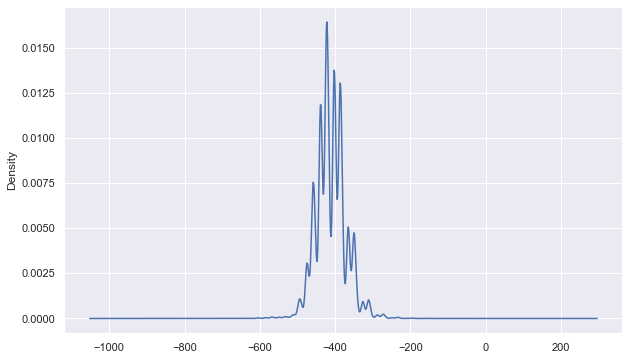

In [11]:
first_round = True
highest_r2 = 0.0
lowest_mse = 0.0

### Round predictions
def predictions(random_state, n_splits, shuffle):
    # k-fold selection
    kfold = KFold(
        n_splits=n_splits,
        random_state=random_state,
        shuffle=shuffle,
    )
    
    # Variance and mean-square error
    fold = 0
    r2_scores = []
    mse_scores = []
    lin_reg = LinearRegression()

    for in_index, oof_index in kfold.split(X, y):
        fold += 1
        print("- Training Fold: ({}/{})".format(fold, N_SPLITS))
        X_in, X_oof = X.loc[in_index], X.loc[oof_index]
        y_in, y_oof = y.loc[in_index], y.loc[oof_index]

        lin_reg.fit(X_in, y_in)
        y_pred = lin_reg.predict(X_oof)
        r2 = r2_score(y_oof, y_pred)
        r2_scores.append(r2)
        mse_score = mean_squared_error(y_oof, y_pred)
        mse_scores.append(mse_score)
    
    # Initialize score
    if (first_round):
        highest_r2 = np.mean(r2_scores)
        lowest_mse = np.mean(mse_score)
    
    # Check r2-score
    if (np.mean(r2_scores) > highest_r2):
        highest_r2 = np.mean(r2_scores)
    
    # Check mse-score
    if (np.mean(mse_score) > lowest_mse):
        lowest_mse = np.mean(mse_score)
    
    # Initial figure
    plt.figure(figsize=FIGSIZE)
    plt.plot(y_oof, y_pred)
    plt.title("Fold {} Prediction".format(fold))
    plt.xlabel("Validation Potential Energy")
    plt.xlabel("Predicted Potential Energy")
    plt.savefig(f'output/potential_energy/plots/validation-and-prediction/rs-{random_state}_ns-{n_splits}_s-{shuffle}.png')
    plt.close()
    
    lin_reg.fit(X, y)
    y_test = lin_reg.predict(molecule_test[selected_features])
    molecule_test[target_feature] = y_test
    
    potential_energy_upd = pd.concat(
        [
            molecule_train[[id_feature, target_feature]],
            molecule_test[[id_feature, target_feature]],
        ],
        ignore_index=True
    )
    
    # Second figure
    plt.figure(figsize=FIGSIZE)
    molecule_train['potential_energy'].plot(kind='kde')
    molecule_test['potential_energy'].plot(kind='kde')
    plt.title("Predicted and Training Potential Energy Density Plot")
    plt.xlabel("Potential Energy")
    plt.savefig(f'output/potential_energy/plots/density-plot/rs-{random_state}_ns-{n_splits}_s-{shuffle}.png')
    plt.close()

    # R2, MSE, random_state, n_splits, shuffle
    row = [np.mean(r2_scores), np.mean(mse_score), random_state, n_splits, shuffle]
    
    # Save data to .csv
    with open('output/potential_energy/csv/results.csv', 'a') as f_csv:
        writer = csv.writer(f_csv)
        writer.writerow(row)
    
    # print('\nkFold Validation Results:')
    print(' * Average Variance Score (R2): \t{:.100f}'.format(np.mean(r2_scores)))
    print(' * Average Mean squared error (MSE): \t{:.100f}\n'.format(np.mean(mse_score)))


# N_SPLITS
for i in range(25):
    # RANDOM_STATE
    for j in range(1000):
        predictions(j, i+2, True)
        predictions(j, i+2, False)

In [19]:
with open('output/potential_energy/csv/results_2.csv') as csv_f:
    with open('output/potential_energy/csv/results_no-empty.csv', 'w', newline='') as csv_out:
        writer = csv.writer(csv_out)
        for row in csv.reader(csv_f):
            if any(field.strip() for field in row):
                writer.writerow(row)

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'li

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'li

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'li

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'li

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'li

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'li

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'li

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'li

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'li

In [21]:
results = []

with open('output/potential_energy/csv/results_no-empty.csv') as csv_f:
    for row in csv.reader(csv_f):
        results.append(row)

In [27]:
results_1 = sorted(results, key=lambda x: x[0])
results_2 = sorted(results, key=lambda x: x[1])
print(results_1[-1])

for res_row in results_2:
    if (res_row[-1] == 'True'):
        print(res_row)
        break

['0.9999989578198367', '0.0016677583918741751', '783', '2', 'True']
['0.999998957784178', '0.0016005158699576969', '597', '4', 'True']


#### Set k-Fold Validation

In [ ]:
'''
kfold = KFold(n_splits=N_SPLITS,
              random_state=RANDOM_STATE,
              shuffle=SHUFFLE)
'''

In [ ]:
'''
fold = 0
r2_scores = []
mse_scores = []
lin_reg = LinearRegression()

for in_index, oof_index in kfold.split(X, y):
    fold += 1
    print("- Training Fold: ({}/{})".format(fold, N_SPLITS))
    X_in, X_oof = X.loc[in_index], X.loc[oof_index]
    y_in, y_oof = y.loc[in_index], y.loc[oof_index]
    
    lin_reg.fit(X_in, y_in)
    y_pred = lin_reg.predict(X_oof)
    r2 = r2_score(y_oof, y_pred)
    r2_scores.append(r2)
    mse_score = mean_squared_error(y_oof, y_pred)
    mse_scores.append(mse_score) 

print('\nkFold Validation Results:')
print(' * Average Variance Score (R2): \t{:.100f}'.format(np.mean(r2_scores)))
print(' * Average Mean squared error (MSE): \t{:.100f}'.format(np.mean(mse_score)))
'''

#### Plot Last Fold Validation and Predicted Potential Energy

In [ ]:
'''
plt.figure(figsize=FIGSIZE)
plt.plot(y_oof, y_pred)
plt.title("Fold {} Prediction".format(fold))
plt.xlabel("Validation Potential Energy")
plt.xlabel("Predicted Potential Energy")
plt.show()
'''

### Predict Potential Energy for Test Data

In [ ]:
'''
lin_reg.fit(X, y)
y_test = lin_reg.predict(molecule_test[selected_features])
molecule_test[target_feature] = y_test
'''

#### Concatenate `molecule_train` and `molecule_test` in the Same Data Frame

In [ ]:
'''
potential_energy_upd = pd.concat([molecule_train[[id_feature, target_feature]],
                                  molecule_test[[id_feature, target_feature]]],
                                 ignore_index=True)
'''

In [ ]:
'''
plt.figure(figsize=FIGSIZE)
molecule_train['potential_energy'].plot(kind='kde')
molecule_test['potential_energy'].plot(kind='kde')
plt.title("Predicted and Training Potential Energy Density Plot")
plt.xlabel("Potential Energy")
plt.show()
'''

#### Arrange Updated Potential Energy Data Frame

In [ ]:
'''
potential_energy_upd = potential_energy_upd.sort_values(id_feature)
potential_energy_upd.reset_index(drop=True, inplace=True)
potential_energy_upd.head()
'''

#### Save Pickled Data

In [ ]:
''' 
if SAVE_PICKLE:
    output_file_path = "output/potential_energy/{}.pkl".format(OUTPUT_FILE)
    print("Saving pickled file {}...".format(output_file_path))
    potential_energy_upd.to_pickle(output_file_path)
'''

## Experiment 2: Atomic Simulation Environment (ASE)
Reference: https://wiki.fysik.dtu.dk/ase/

In [ ]:
'''
molecule = Atoms(
    'CH4',
    [
        (-0.0126981359, 1.085804158, 0.0080009958),
        (0.002150416, -0.0060313176, 0.0019761204),
        (1.011730843, 1.463751162, 0.0002765748),
        (-0.540815069, 1.447526614, -0.8766437152),
        (-0.5238136345, 1.437932644, 0.9063972942),
    ]
)
molecule.set_calculator(EMT())
e_molecule = molecule.get_potential_energy()

#e_atomization = e_molecule - 2 * e_atom

import math

# print('Nitrogen atom energy: %5.2f eV' % e_atom)
print('Molecule energy: %f eV' % (e_molecule))#  * 1.602176634 * math.pow(10, -19)))
#print('Atomization energy: %5.2f eV' % -e_atomization)
'''